In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Read file csv
df = pd.read_csv('NVL-Historical-Data.csv')
df.head()

,Unnamed: 0,Date,Price
0,0,2017-01-03,25055.00
1,1,2017-01-04,25225.00
2,2,2017-01-05,25097.00
3,3,2017-01-06,25140.00
4,4,2017-01-07,25129.25


In [3]:
df = df.reset_index()['Price']
df

0       25055.00
1       25225.00
2       25097.00
3       25140.00
4       25129.25
          ...   
2702    14500.00
2703    14150.00
2704    14150.00
2705    14450.00
2706    14350.00
Name: Price, Length: 2707, dtype: float64

In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))
print(df.shape)

(2707, 1)


In [5]:
#Split train:test 7:3
train_size_7_3 = int(0.7 * len(df))
test_size_7_3 = len(df) - train_size_7_3

train_data_7_3 = df[:train_size_7_3]
test_data_7_3 = df[train_size_7_3:]

#Split train:test 8:2
train_size_8_2 = int(0.8 * len(df))
test_size_8_2 = len(df) - train_size_8_2

train_data_8_2 = df[:train_size_8_2]
test_data_8_2 = df[train_size_8_2:]

#Split train:test 9:1
train_size_9_1 = int(0.9 * len(df))
test_size_9_1 = len(df) - train_size_9_1

train_data_9_1 = df[:train_size_9_1]
test_data_9_1 = df[train_size_9_1:]

In [6]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [7]:
time_step = 100

x_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
x_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

x_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
x_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

x_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
x_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

In [8]:
x_train_7_3 = x_train_7_3.reshape(x_train_7_3.shape[0],x_train_7_3.shape[1] , 1)
x_test_7_3 = x_test_7_3.reshape(x_test_7_3.shape[0],x_test_7_3.shape[1] , 1)

In [9]:
x_train_8_2 = x_train_8_2.reshape(x_train_8_2.shape[0],x_train_8_2.shape[1] , 1)
x_test_8_2 = x_test_8_2.reshape(x_test_8_2.shape[0],x_test_8_2.shape[1] , 1)

In [10]:
x_train_9_1 = x_train_9_1.reshape(x_train_9_1.shape[0],x_train_9_1.shape[1] , 1)
x_test_9_1 = x_test_9_1.reshape(x_test_9_1.shape[0],x_test_9_1.shape[1] , 1)

In [12]:
def forecast_future_days(model, test_data, pred_days):
    x_input=test_data[-20:].reshape(1,-1)
    x_input.shape

    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()

    from numpy import array

    lstm_output=[]
    n_steps=x_input.shape[1]
    i=0
    while(i<pred_days):

        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lstm_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lstm_output.extend(yhat.tolist())
            i=i+1
    return lstm_output

## Model with ratio 7:3

In [13]:
# Build model
model_7_3 =Sequential()
model_7_3.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_7_3.add(LSTM(50,return_sequences=True))
model_7_3.add(LSTM(50))
model_7_3.add(Dense(1))
model_7_3.compile(loss='mean_squared_error',optimizer='adam')

In [14]:
# Fit model
model_7_3.fit(x_train_7_3, y_train_7_3, validation_data=(x_test_7_3, y_test_7_3), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
29/29 [==============================] - 8s 63ms/step - loss: 0.0281 - val_loss: 0.0056
Epoch 2/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0030 - val_loss: 0.0035
Epoch 3/100
29/29 [==============================] - 1s 22ms/step - loss: 0.0026 - val_loss: 0.0040
Epoch 4/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 5/100
29/29 [==============================] - 1s 27ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 6/100
29/29 [==============================] - 1s 26ms/step - loss: 0.0025 - val_loss: 0.0036
Epoch 7/100
29/29 [==============================] - 1s 27ms/step - loss: 0.0025 - val_loss: 0.0029
Epoch 8/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0023 - val_loss: 0.0027
Epoch 9/100
29/29 [==============================] - 1s 20ms/step - loss: 0.0033 - val_loss: 0.0028
Epoch 10/100
29/29 [==============================] - 1s 19ms/step - loss: 0.0024 - val_loss: 0.0029

In [15]:
# Predict
y_pred_7_3 = model_7_3.predict(x_test_7_3)
y_pred_7_3

23/23 [==============================] - 1s 10ms/step


array([[0.79971766],
       [0.79852897],
       [0.80024904],
       [0.79804146],
       [0.7924422 ],
       [0.7861525 ],
       [0.8006807 ],
       [0.79003304],
       [0.83353776],
       [0.76773995],
       [0.81015366],
       [0.7793906 ],
       [0.7947438 ],
       [0.7983011 ],
       [0.7938827 ],
       [0.7803012 ],
       [0.7840155 ],
       [0.7800323 ],
       [0.7872511 ],
       [0.77958906],
       [0.782751  ],
       [0.78035635],
       [0.7773291 ],
       [0.7787603 ],
       [0.7792086 ],
       [0.7791479 ],
       [0.77762395],
       [0.7775532 ],
       [0.7772337 ],
       [0.7776354 ],
       [0.77703726],
       [0.7802296 ],
       [0.78112066],
       [0.77727187],
       [0.7792508 ],
       [0.7781518 ],
       [0.7772206 ],
       [0.7799436 ],
       [0.7760492 ],
       [0.781526  ],
       [0.7833673 ],
       [0.7764068 ],
       [0.7812104 ],
       [0.7862025 ],
       [0.79317516],
       [0.79435897],
       [0.81794655],
       [0.829

In [16]:
# Scaler inverse transform
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3.reshape(-1,1))
y_pred_7_3

array([[75919.62  ],
       [75822.    ],
       [75963.25  ],
       [75781.97  ],
       [75322.18  ],
       [74805.695 ],
       [75998.695 ],
       [75124.35  ],
       [78696.78  ],
       [73293.734 ],
       [76776.58  ],
       [74250.44  ],
       [75511.18  ],
       [75803.29  ],
       [75440.47  ],
       [74325.21  ],
       [74630.21  ],
       [74303.125 ],
       [74895.914 ],
       [74266.734 ],
       [74526.38  ],
       [74329.74  ],
       [74081.16  ],
       [74198.68  ],
       [74235.49  ],
       [74230.51  ],
       [74105.37  ],
       [74099.555 ],
       [74073.32  ],
       [74106.305 ],
       [74057.19  ],
       [74319.336 ],
       [74392.5   ],
       [74076.45  ],
       [74238.95  ],
       [74148.71  ],
       [74072.24  ],
       [74295.84  ],
       [73976.055 ],
       [74425.79  ],
       [74576.984 ],
       [74005.42  ],
       [74399.875 ],
       [74809.805 ],
       [75382.37  ],
       [75479.58  ],
       [77416.5   ],
       [78328

In [17]:
#Forecast 30 days
forecast_30days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 30)
#Forecast 60 days
forecast_60days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 60)
#Forecast 90 days
forecast_90days_7_3 = forecast_future_days(model_7_3, test_data_7_3, 90)

[0.08069898]
21
1 day input [0.04323153 0.04810268 0.04871158 0.04932047 0.04639778 0.04639778
 0.04932047 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471
 0.05029471 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716
 0.04992937 0.08069898]
1 day output [[0.08580808]]
2 day input [0.04810268 0.04871158 0.04932047 0.04639778 0.04639778 0.04932047
 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471
 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937
 0.08069898 0.08580808]
2 day output [[0.09348349]]
3 day input [0.04871158 0.04932047 0.04639778 0.04639778 0.04932047 0.04932047
 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605
 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937 0.08069898
 0.08580808 0.09348349]
3 day output [[0.10178375]]
4 day input [0.04932047 0.04639778 0.04639778 0.04932047 0.04932047 0.05114716
 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605 0.05175605
 0.04749379 0.04749379 0.05114716 0.0499293

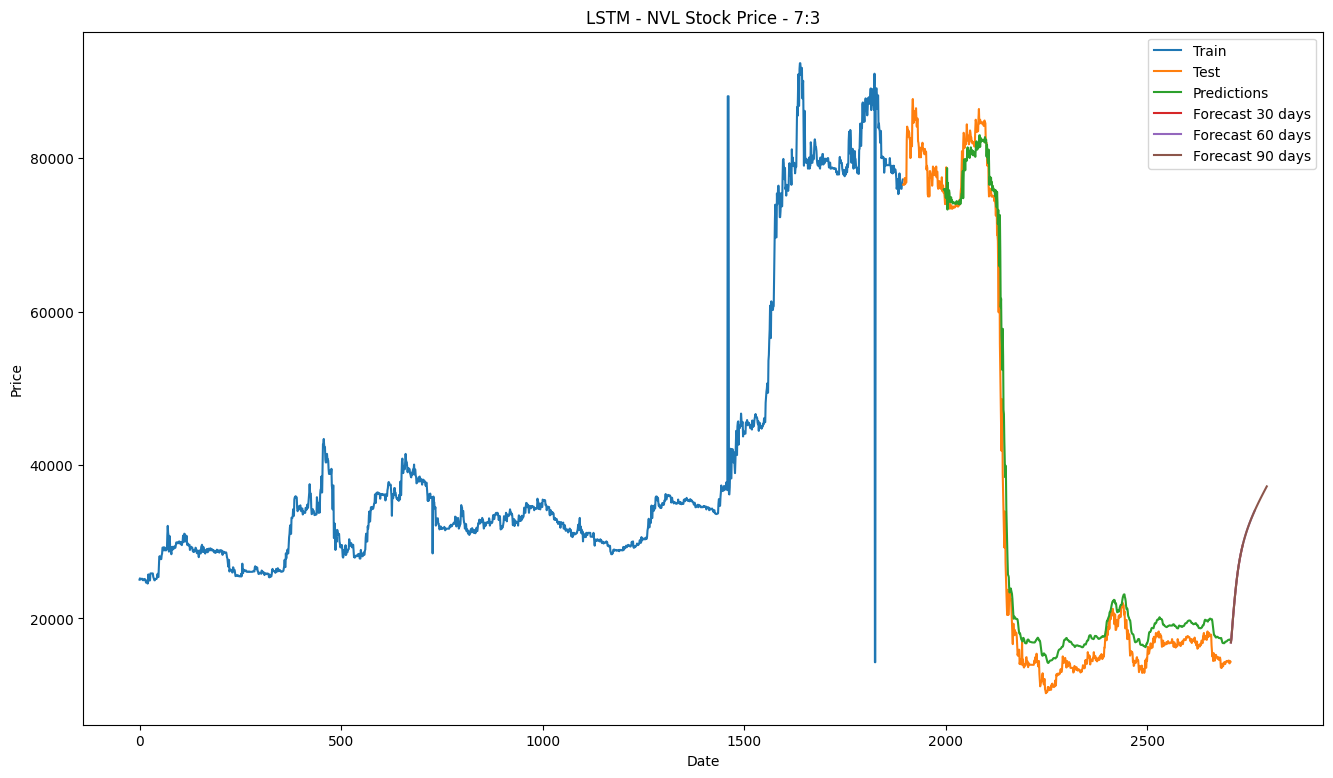

In [18]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_7_3, step=1)
plt.plot(scaler.inverse_transform(train_data_7_3))
test_data_index = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_7_3))
predict_data_index = pd.RangeIndex(start=train_size_7_3 + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), step=1)
plt.plot(predict_data_index,y_pred_7_3)
forecast_data_30_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_30days_7_3), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_7_3).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_60days_7_3), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_7_3).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)), stop=train_size_7_3+len(y_pred_7_3) + (len(test_data_7_3) - len(y_pred_7_3)) + len(forecast_90days_7_3), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_7_3).reshape(-1,1)))

plt.title('LSTM - NVL Stock Price - 7:3')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [19]:
y_test_7_3 = y_test_7_3.reshape(-1,1)
y_test_7_3 = scaler.inverse_transform(y_test_7_3)

rmse = np.sqrt(mean_squared_error(y_test_7_3, y_pred_7_3))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_7_3, y_pred_7_3)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_7_3, y_pred_7_3)
print("MAPE:", mape)

RMSE: 3057.0686568872616
MAE: 2581.927202660493
MAPE: 0.1469656443916026


### 8:2

In [20]:
model_8_2 =Sequential()
model_8_2.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_8_2.add(LSTM(50,return_sequences=True))
model_8_2.add(LSTM(50))
model_8_2.add(Dense(1))
model_8_2.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model_8_2.fit(x_train_8_2, y_train_8_2, validation_data=(x_test_8_2, y_test_8_2), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
33/33 [==============================] - 8s 79ms/step - loss: 0.0243 - val_loss: 7.8303e-04
Epoch 2/100
33/33 [==============================] - 1s 23ms/step - loss: 0.0032 - val_loss: 7.1058e-04
Epoch 3/100
33/33 [==============================] - 1s 20ms/step - loss: 0.0030 - val_loss: 8.2700e-04
Epoch 4/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0030 - val_loss: 5.9633e-04
Epoch 5/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0027 - val_loss: 5.5579e-04
Epoch 6/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 9.2100e-04
Epoch 7/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 3.2233e-04
Epoch 8/100
33/33 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 3.2861e-04
Epoch 9/100
33/33 [==============================] - 1s 18ms/step - loss: 0.0028 - val_loss: 1.8659e-04
Epoch 10/100
33/33 [==============================] - 1s 19ms/st

In [22]:
y_pred_8_2 = model_8_2.predict(x_test_8_2)
y_pred_8_2

14/14 [==============================] - 1s 9ms/step


array([[0.02989919],
       [0.03037263],
       [0.03038061],
       [0.0301806 ],
       [0.02988069],
       [0.02970947],
       [0.02974024],
       [0.03124838],
       [0.03195801],
       [0.03198063],
       [0.03451166],
       [0.03764764],
       [0.04006053],
       [0.04211608],
       [0.04348953],
       [0.04426792],
       [0.04471539],
       [0.04536982],
       [0.04583361],
       [0.04631928],
       [0.0475697 ],
       [0.04921814],
       [0.049844  ],
       [0.04987743],
       [0.05034303],
       [0.05285268],
       [0.05752545],
       [0.06071388],
       [0.06174303],
       [0.06194252],
       [0.06197541],
       [0.06325307],
       [0.06490099],
       [0.06556849],
       [0.06535968],
       [0.06318403],
       [0.06267796],
       [0.06311284],
       [0.06282198],
       [0.0615835 ],
       [0.06074604],
       [0.06065129],
       [0.06127151],
       [0.06137588],
       [0.06118625],
       [0.05991275],
       [0.0585127 ],
       [0.057

In [23]:
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2.reshape(-1,1))
y_pred_8_2

array([[12705.202 ],
       [12744.078 ],
       [12744.734 ],
       [12728.311 ],
       [12703.683 ],
       [12689.623 ],
       [12692.15  ],
       [12815.991 ],
       [12874.265 ],
       [12876.12  ],
       [13083.959 ],
       [13341.474 ],
       [13539.609 ],
       [13708.403 ],
       [13821.187 ],
       [13885.104 ],
       [13921.849 ],
       [13975.588 ],
       [14013.672 ],
       [14053.554 ],
       [14156.232 ],
       [14291.597 ],
       [14342.989 ],
       [14345.735 ],
       [14383.968 ],
       [14590.051 ],
       [14973.759 ],
       [15235.58  ],
       [15320.09  ],
       [15336.472 ],
       [15339.173 ],
       [15444.088 ],
       [15579.409 ],
       [15634.223 ],
       [15617.076 ],
       [15438.419 ],
       [15396.862 ],
       [15432.574 ],
       [15408.69  ],
       [15306.99  ],
       [15238.223 ],
       [15230.441 ],
       [15281.371 ],
       [15289.941 ],
       [15274.37  ],
       [15169.795 ],
       [15054.828 ],
       [14968

In [24]:
#Forecast 30 days
forecast_30days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 30)
#Forecast 60 days
forecast_60days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 60)
#Forecast 90 days
forecast_90days_8_2 = forecast_future_days(model_8_2, test_data_8_2, 90)

[0.05703206]
21
1 day input [0.04323153 0.04810268 0.04871158 0.04932047 0.04639778 0.04639778
 0.04932047 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471
 0.05029471 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716
 0.04992937 0.05703206]
1 day output [[0.0584308]]
2 day input [0.04810268 0.04871158 0.04932047 0.04639778 0.04639778 0.04932047
 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471
 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937
 0.05703206 0.0584308 ]
2 day output [[0.06026343]]
3 day input [0.04871158 0.04932047 0.04639778 0.04639778 0.04932047 0.04932047
 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605
 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937 0.05703206
 0.0584308  0.06026343]
3 day output [[0.06209499]]
4 day input [0.04932047 0.04639778 0.04639778 0.04932047 0.04932047 0.05114716
 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605 0.05175605
 0.04749379 0.04749379 0.05114716 0.04992937

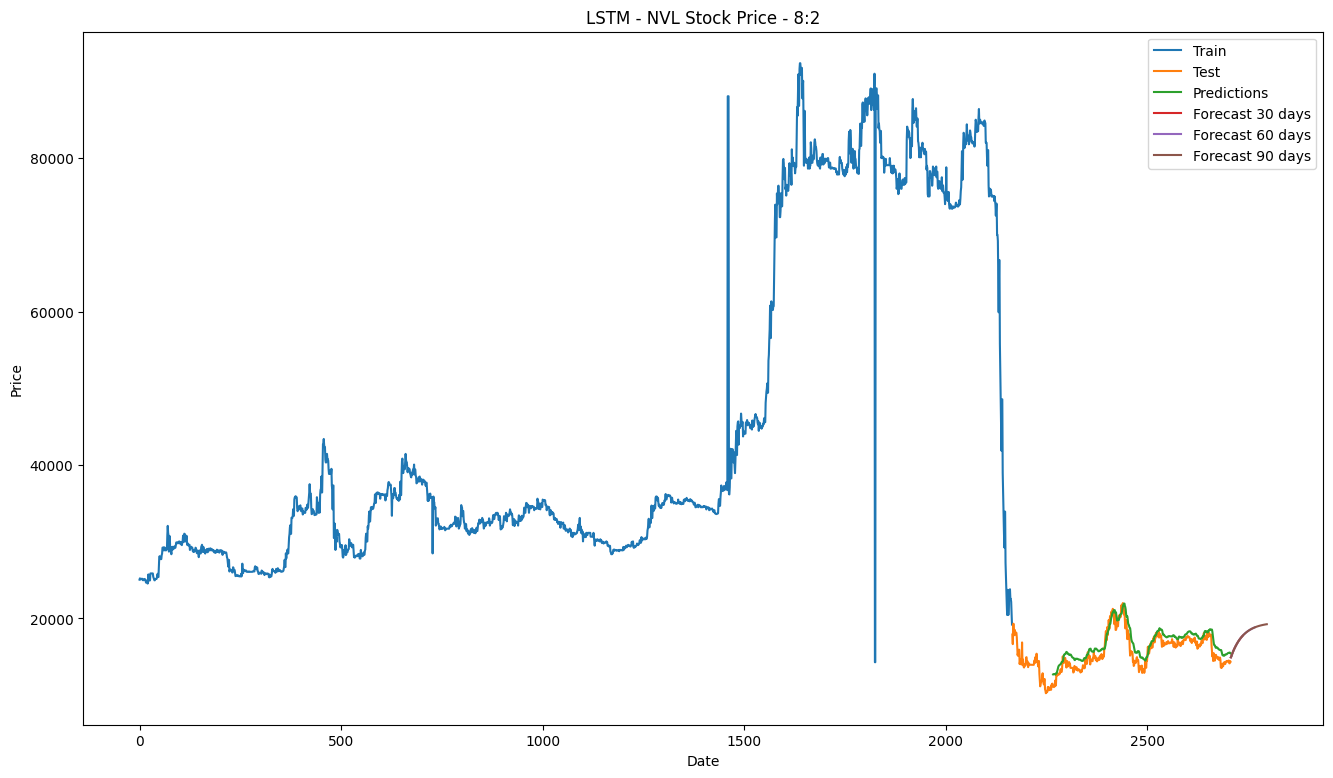

In [25]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_8_2, step=1)
plt.plot(scaler.inverse_transform(train_data_8_2))
test_data_index = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_8_2))
predict_data_index = pd.RangeIndex(start=train_size_8_2 + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), step=1)
plt.plot(predict_data_index,y_pred_8_2)
forecast_data_30_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_30days_8_2), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_8_2).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_60days_8_2), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_8_2).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)), stop=train_size_8_2+len(y_pred_8_2) + (len(test_data_8_2) - len(y_pred_8_2)) + len(forecast_90days_8_2), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_8_2).reshape(-1,1)))

plt.title('LSTM - NVL Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [26]:
y_test_8_2 = y_test_8_2.reshape(-1,1)
y_test_8_2 = scaler.inverse_transform(y_test_8_2)

rmse = np.sqrt(mean_squared_error(y_test_8_2, y_pred_8_2))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_8_2, y_pred_8_2)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_8_2, y_pred_8_2)
print("MAPE:", mape)

RMSE: 1116.5332996043912
MAE: 992.8228893553949
MAPE: 0.06578210342825887


## 9:1

In [27]:
model_9_1 =Sequential()
model_9_1.add(LSTM(50,return_sequences=True,input_shape=(time_step, 1)))
model_9_1.add(LSTM(50,return_sequences=True))
model_9_1.add(LSTM(50))
model_9_1.add(Dense(1))
model_9_1.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model_9_1.fit(x_train_9_1, y_train_9_1, validation_data=(x_test_9_1, y_test_9_1), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
37/37 [==============================] - 8s 52ms/step - loss: 0.0367 - val_loss: 4.2218e-04
Epoch 2/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0033 - val_loss: 6.5066e-04
Epoch 3/100
37/37 [==============================] - 1s 19ms/step - loss: 0.0028 - val_loss: 2.4417e-04
Epoch 4/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 9.3015e-05
Epoch 5/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0025 - val_loss: 2.5113e-04
Epoch 6/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0024 - val_loss: 6.7655e-05
Epoch 7/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0023 - val_loss: 2.2638e-04
Epoch 8/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0022 - val_loss: 1.6564e-04
Epoch 9/100
37/37 [==============================] - 1s 18ms/step - loss: 0.0023 - val_loss: 1.0534e-04
Epoch 10/100
37/37 [==============================] - 1s 18ms/st

In [29]:
y_pred_9_1 = model_9_1.predict(x_test_9_1)
y_pred_9_1

6/6 [==============================] - 1s 10ms/step


array([[0.08719087],
       [0.08294132],
       [0.08079532],
       [0.08047305],
       [0.08077531],
       [0.07920435],
       [0.07832733],
       [0.07779187],
       [0.07704547],
       [0.07633562],
       [0.07585315],
       [0.07553478],
       [0.07602702],
       [0.07668065],
       [0.07692014],
       [0.07665847],
       [0.07721791],
       [0.07749997],
       [0.07758592],
       [0.07744391],
       [0.07710983],
       [0.07694501],
       [0.0770414 ],
       [0.07722078],
       [0.07728861],
       [0.07730414],
       [0.07861668],
       [0.07943952],
       [0.07942604],
       [0.07899553],
       [0.07709703],
       [0.07668976],
       [0.0770008 ],
       [0.07591817],
       [0.07545349],
       [0.07420166],
       [0.07317995],
       [0.07275711],
       [0.07256243],
       [0.07245322],
       [0.07478793],
       [0.07674281],
       [0.07715231],
       [0.07660717],
       [0.0759078 ],
       [0.07600888],
       [0.07641318],
       [0.075

In [30]:
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1.reshape(-1,1))
y_pred_9_1

array([[17409.766],
       [17060.81 ],
       [16884.588],
       [16858.125],
       [16882.945],
       [16753.945],
       [16681.928],
       [16637.957],
       [16576.666],
       [16518.377],
       [16478.758],
       [16452.613],
       [16493.035],
       [16546.707],
       [16566.373],
       [16544.887],
       [16590.826],
       [16613.988],
       [16621.045],
       [16609.385],
       [16581.951],
       [16568.416],
       [16576.332],
       [16591.062],
       [16596.63 ],
       [16597.906],
       [16705.688],
       [16773.256],
       [16772.148],
       [16736.797],
       [16580.9  ],
       [16547.457],
       [16572.998],
       [16484.096],
       [16445.94 ],
       [16343.144],
       [16259.244],
       [16224.522],
       [16208.536],
       [16199.568],
       [16391.285],
       [16551.812],
       [16585.44 ],
       [16540.674],
       [16483.244],
       [16491.545],
       [16524.744],
       [16462.082],
       [16388.693],
       [16387.012],


In [31]:
#Forecast 30 days
forecast_30days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 30)
#Forecast 60 days
forecast_60days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 60)
#Forecast 90 days
forecast_90days_9_1 = forecast_future_days(model_9_1, test_data_9_1, 90)

[0.04568441]
21
1 day input [0.04323153 0.04810268 0.04871158 0.04932047 0.04639778 0.04639778
 0.04932047 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471
 0.05029471 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716
 0.04992937 0.04568441]
1 day output [[0.04506562]]
2 day input [0.04810268 0.04871158 0.04932047 0.04639778 0.04639778 0.04932047
 0.04932047 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471
 0.05175605 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937
 0.04568441 0.04506562]
2 day output [[0.04407246]]
3 day input [0.04871158 0.04932047 0.04639778 0.04639778 0.04932047 0.04932047
 0.05114716 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605
 0.05175605 0.04749379 0.04749379 0.05114716 0.04992937 0.04568441
 0.04506562 0.04407246]
3 day output [[0.04298082]]
4 day input [0.04932047 0.04639778 0.04639778 0.04932047 0.04932047 0.05114716
 0.05053826 0.05114716 0.05029471 0.05029471 0.05175605 0.05175605
 0.04749379 0.04749379 0.05114716 0.0499293

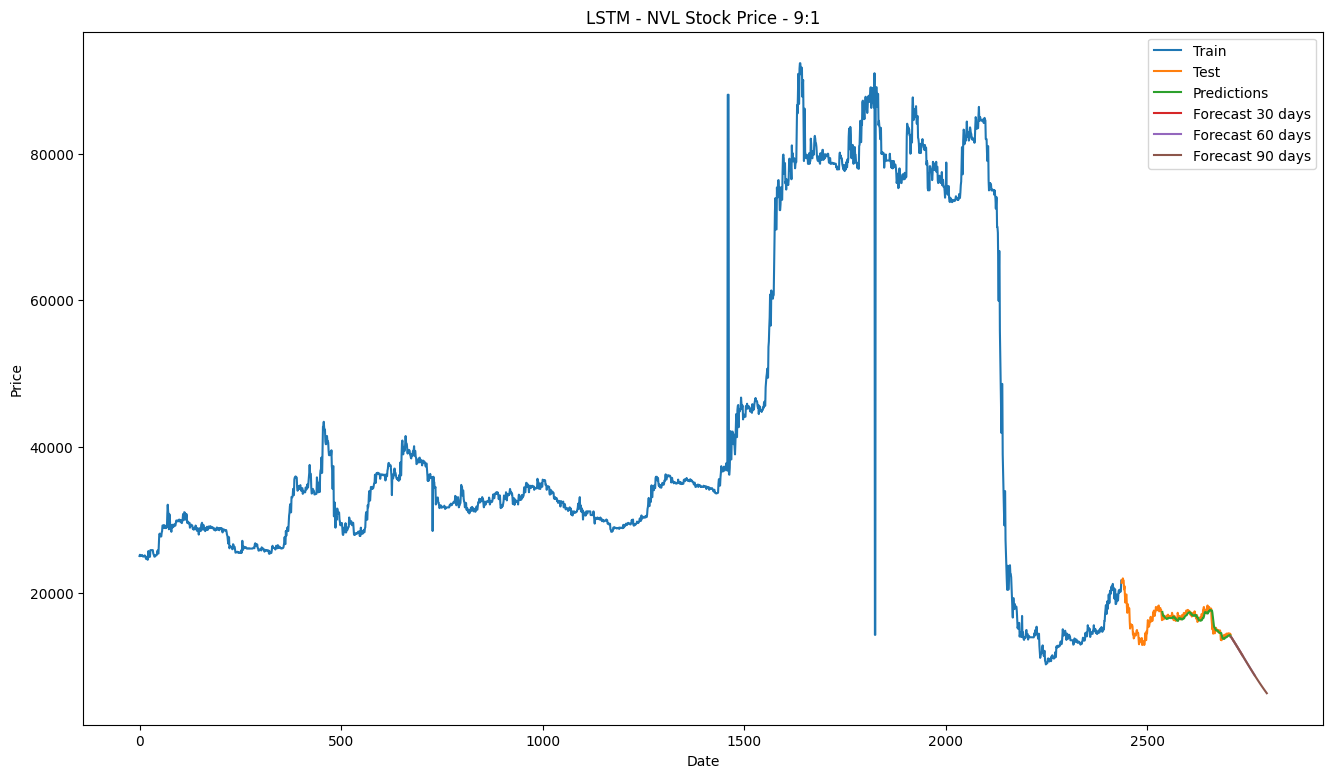

In [32]:
plt.figure(figsize =(16, 9))

train_data_index = pd.RangeIndex(start=0, stop=train_size_9_1, step=1)
plt.plot(scaler.inverse_transform(train_data_9_1))
test_data_index = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1+len(test_data_9_1), step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data_9_1))
predict_data_index = pd.RangeIndex(start=train_size_9_1 + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), step=1)
plt.plot(predict_data_index,y_pred_9_1)
forecast_data_30_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_30days_9_1), step=1)
plt.plot(forecast_data_30_index,scaler.inverse_transform(np.array(forecast_30days_9_1).reshape(-1,1)))
forecast_data_60_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_60days_9_1), step=1)
plt.plot(forecast_data_60_index,scaler.inverse_transform(np.array(forecast_60days_9_1).reshape(-1,1)))
forecast_data_90_index = pd.RangeIndex(start=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)), stop=train_size_9_1+len(y_pred_9_1) + (len(test_data_9_1) - len(y_pred_9_1)) + len(forecast_90days_9_1), step=1)
plt.plot(forecast_data_90_index,scaler.inverse_transform(np.array(forecast_90days_9_1).reshape(-1,1)))

plt.title('LSTM - NVL Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predictions', 'Forecast 30 days', 'Forecast 60 days', 'Forecast 90 days'])
plt.show()

In [33]:
y_test_9_1 = y_test_9_1.reshape(-1,1)
y_test_9_1 = scaler.inverse_transform(y_test_9_1)

rmse = np.sqrt(mean_squared_error(y_test_9_1, y_pred_9_1))
print("RMSE:", rmse)
mae = mean_absolute_error(y_test_9_1, y_pred_9_1)
print("MAE:", mae)
mape = mean_absolute_percentage_error(y_test_9_1, y_pred_9_1)
print("MAPE:", mape)

RMSE: 440.87980493767213
MAE: 325.34123583026957
MAPE: 0.01999749098568466
